In [1]:
%load_ext autoreload

In [2]:
%autoreload
from tracer.simulator import TraceSimulator

sim = TraceSimulator(
    number_towers=200,
    number_users=100,
    number_cycles=24,
    expander=1,
    sigma=0.005,
    vel_friction=0.9,
#     method='distance_square',
#     verbose=True,
)

In [3]:
sim.generate()

In [4]:
%autoreload
from tracer.simulator import MobilitySimulator

ms = MobilitySimulator(
    towers=sim.towers,
    number_users=100,
    number_cycles=24,
    velocity=(0.1, 0.3),
    wt=1,
    type="random_direction",
    repeat=10,
)

In [5]:
ms.generate()

In [6]:
ms.traces.shape, ms.tower_traces.shape, ms.aggregated_data.shape

((100, 24, 2), (100, 240), (240, 225))

# Traces recovery

In [7]:
%autoreload
import numpy as np
from tracer.recover import TrajectoryRecovery

tr = TrajectoryRecovery(
    number_users=100,
    towers=sim.towers,
    aggregated_data=ms.aggregated_data,
    vel_friction=0.9
)

In [8]:
tr.build_distribution_matrix()

In [9]:
tr.L.shape

(240, 100)

In [10]:
res = tr.trajectory_recovery_generator()

In [11]:
mapping, global_accuracy, acc = tr.map_traces(ms.tower_traces)
global_accuracy

0.035791666666666666

User 1 mapped to simulated trace 99


<Figure size 432x288 with 0 Axes>

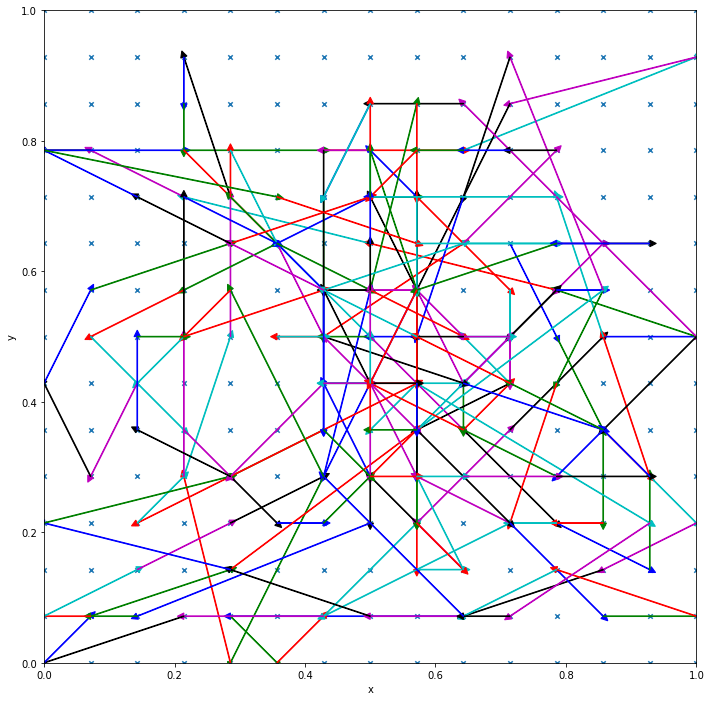

<Figure size 432x288 with 0 Axes>

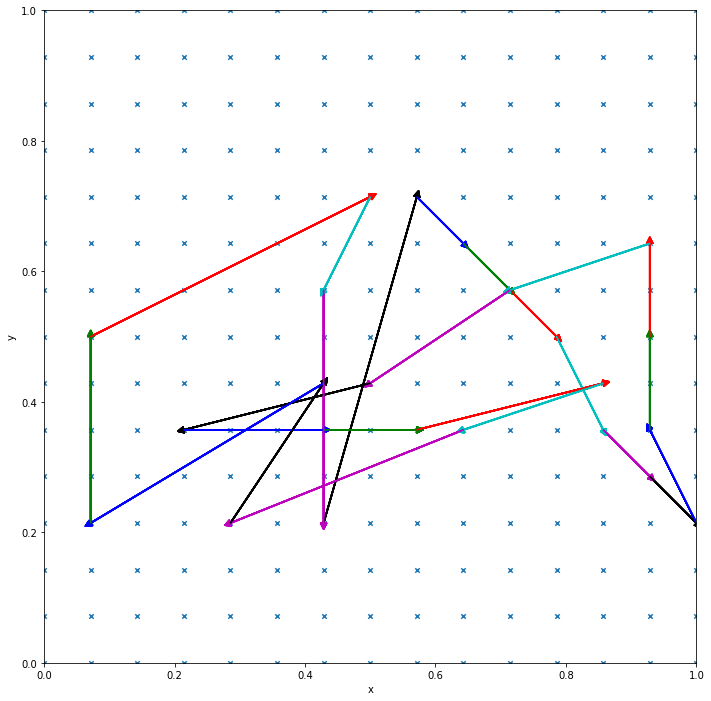

In [13]:
user = 1
recovered_trace = tr.S.T[user]
print(f'User {user} mapped to simulated trace {mapping[user]}')
mapped_trace = ms.tower_traces[mapping[user]]

import matplotlib.pyplot as plt

plt.figure()
tr.towers_manager.plot_user_trace(recovered_trace, annotate_towers=False)

plt.figure()
tr.towers_manager.plot_user_trace(mapped_trace, annotate_towers=False)

In [ ]:
np.tile(ms.tower_traces, 2).shape